In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Nokia1_file = "/content/drive/MyDrive/Second Sem/Nokia1.mp3"
Nokia2_file = "/content/drive/MyDrive/Second Sem/Nokia2.mp3"

In [4]:
ipd.Audio(Nokia1_file)

In [5]:
ipd.Audio(Nokia2_file)

In [6]:
Nokia1, sr = librosa.load(Nokia1_file)
Nokia2, _ = librosa.load(Nokia2_file)

In [7]:
Nokia1.shape

(154944,)

In [8]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


In [9]:
# total number of samples in audio file
tot_samples = len(Nokia1)
tot_samples

154944

In [10]:
# duration of Nokia1 audio in seconds
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 7.026938775510204 seconds


In [11]:
y_harmonic, y_percussive = librosa.effects.hpss(Nokia1)

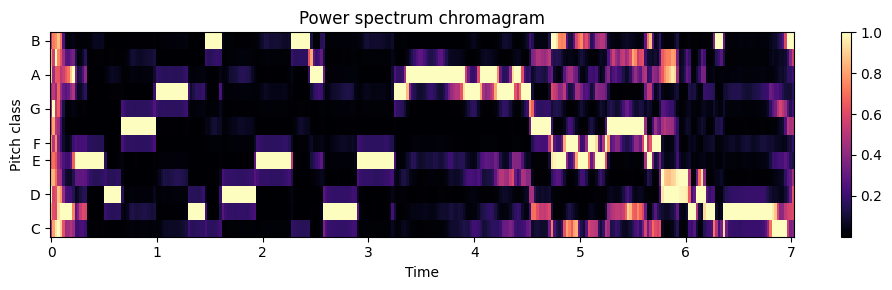

In [12]:
# using a power spectrum
chroma_d = librosa.feature.chroma_stft(y=Nokia1, sr=sr)

plt.figure(figsize=(10, 3))
librosa.display.specshow(chroma_d, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Power spectrum chromagram')
plt.tight_layout()
plt.show()

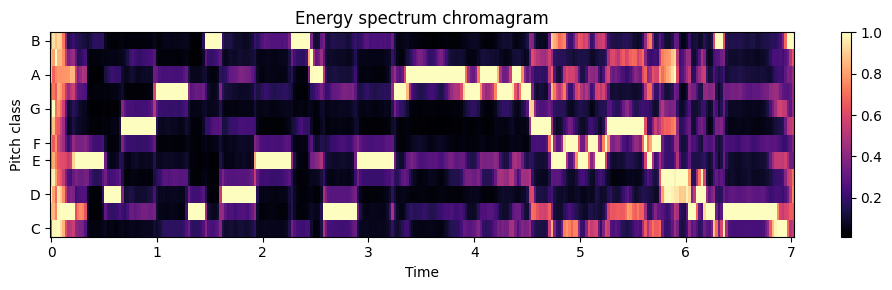

In [13]:
# using an energy (magnitude) spectrum
S = np.abs(librosa.stft(Nokia1)) # apply short-time fourier transform
chroma_e = librosa.feature.chroma_stft(S=S, sr=sr)

plt.figure(figsize=(10, 3))
librosa.display.specshow(chroma_e, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Energy spectrum chromagram')
plt.tight_layout()
plt.show()

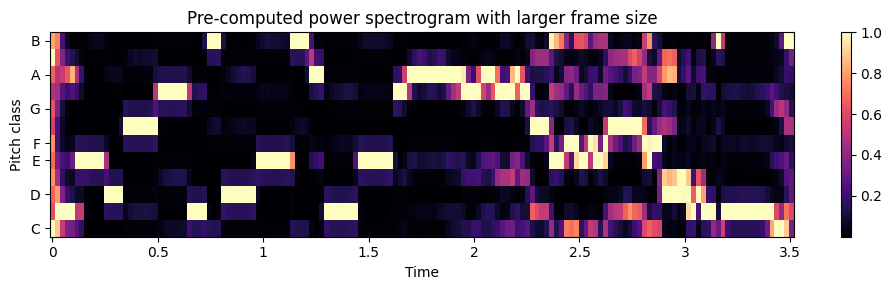

In [14]:
# using a pre-computed power spectrogram with a larger frame
S = np.abs(librosa.stft(Nokia1, n_fft=4096))**2
chroma_p = librosa.feature.chroma_stft(S=S, sr=sr)

plt.figure(figsize=(10, 3))
librosa.display.specshow(chroma_p, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Pre-computed power spectrogram with larger frame size')
plt.tight_layout()
plt.show()

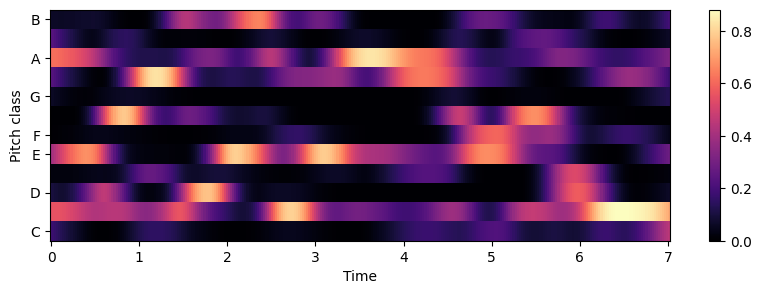

In [15]:
chroma = librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
plt.figure(figsize=(10, 3))
librosa.display.specshow(chroma,y_axis='chroma', x_axis='time')
plt.colorbar()

Tonality based features

<Axes: title={'center': 'Standard Deviation CENS'}>

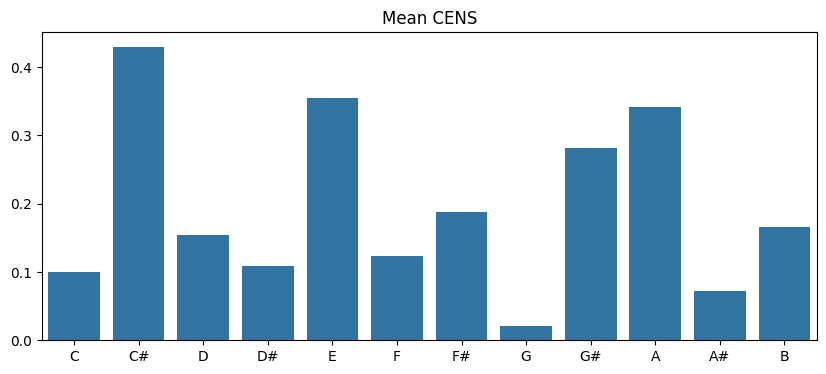

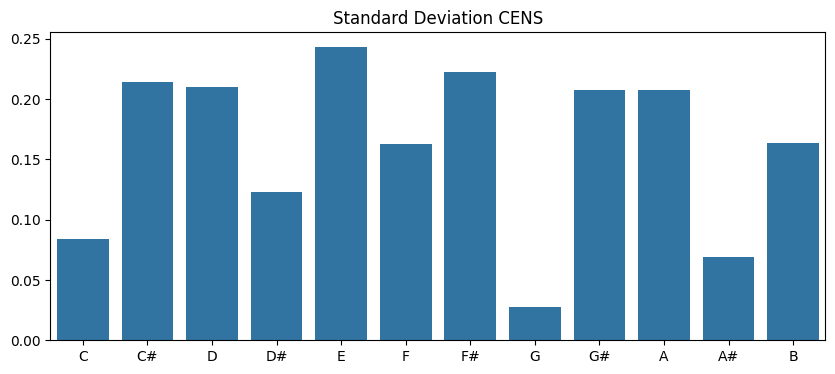

In [18]:
# a pitch histogram using CENS
chroma_mean = np.mean(chroma,axis=1)
chroma_std = np.std(chroma,axis=1)

# plot the summary
octave = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
plt.figure(figsize = (10,4))
plt.title('Mean CENS')
sns.barplot(x=octave,y=chroma_mean)

plt.figure(figsize = (10,4))
plt.title('Standard Deviation CENS')
sns.barplot(x=octave,y=chroma_std)